In [41]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv("dahlia_data/data-40000.csv")

In [43]:
df.columns
y = df["averageRating"]
X = df.drop(["averageRating","numVotes"],axis=1)

In [44]:
#Drop index cols
X = X.iloc[:,3:]

In [45]:
pd.concat([X,y],axis=1).corr(method="spearman")["averageRating"].sort_values()

Horror           -0.182616
Comedy           -0.111548
Thriller         -0.108114
Action           -0.105606
Sci-Fi           -0.091230
                    ...   
Biography         0.101757
Drama             0.105895
runtimeMinutes    0.109611
Documentary       0.270255
averageRating     1.000000
Name: averageRating, Length: 61, dtype: float64

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [47]:
rf.fit(X,y)

RandomForestRegressor()

<BarContainer object of 10 artists>

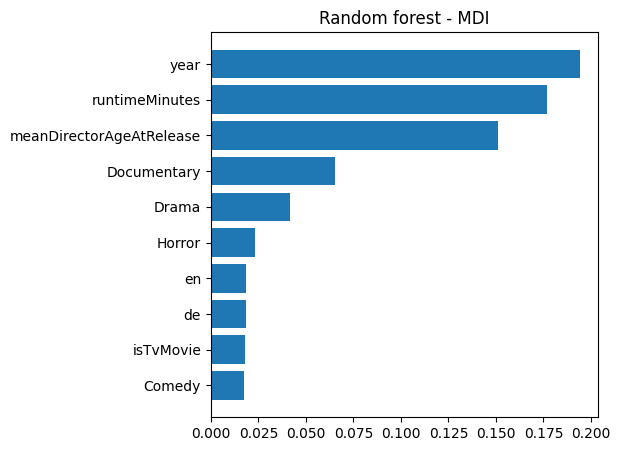

In [75]:
#MDI 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(5,5))
x_axis = rf.feature_importances_
y_axis = X.columns
sorted_idx = x_axis.argsort()
x_axis = x_axis[sorted_idx]
y_axis = y_axis[sorted_idx]
axs.set_title("Random forest - MDI")
axs.barh(y_axis[-10:], x_axis[-10:])

In [49]:
# Permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X, y)


Text(0.5, 1.0, 'Random Forest - permutation importance')

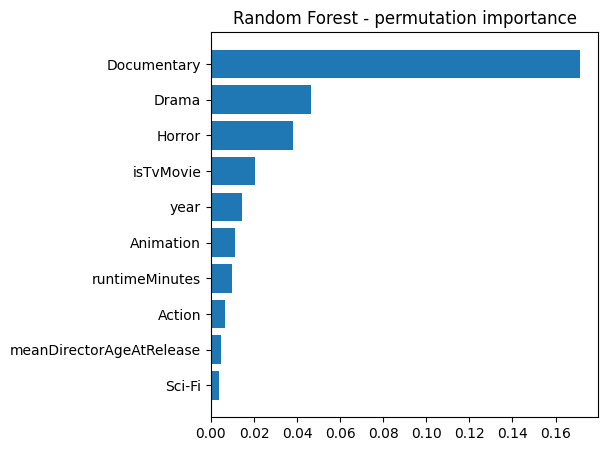

In [74]:
fig, axs = plt.subplots(figsize=(5,5))
sorted_idx = perm_importance.importances_mean.argsort()
axs.barh(X.columns[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx][-10:])
axs.set_title("Random Forest - permutation importance")

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [52]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(lr, X, y)

Text(0.5, 1.0, 'Linear regression - permutation importance')

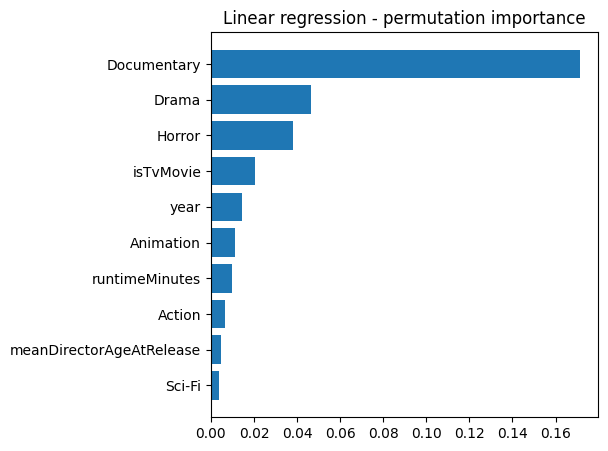

In [79]:
fig, axs = plt.subplots(figsize=(5,5))
sorted_idx = perm_importance.importances_mean.argsort()
axs.barh(X.columns[sorted_idx][-10:], perm_importance.importances_mean[sorted_idx[-10:]])
axs.set_title("Linear regression - permutation importance")

In [80]:
from xgboost import XGBRegressor

In [82]:
x = XGBRegressor(importance_type="gain")
x.fit(X,y)

c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type='gain',
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 1.0, 'XGBoost - Gain')

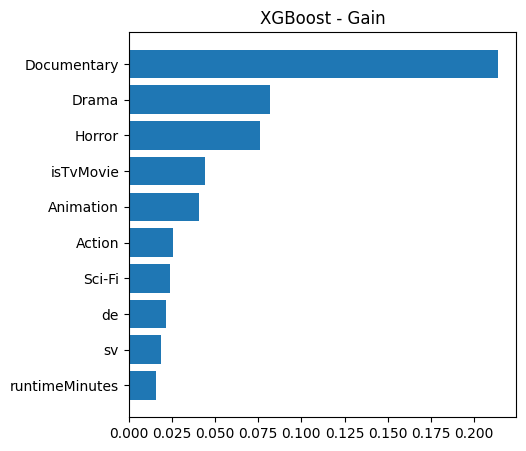

In [88]:
fig, axs = plt.subplots(figsize=(5,5))
importances = x.feature_importances_
sorted_idx=importances.argsort()
axs.barh(X.columns[sorted_idx][-10:], importances[sorted_idx[-10:]])
axs.set_title("XGBoost - Gain")

In [93]:
pd.concat([X,y],axis=1).corr(method="spearman")["averageRating"][["Documentary","isTvMovie","runtimeMinutes","Drama","Horror"]].sort_values()

Horror           -0.182616
isTvMovie         0.091766
Drama             0.105895
runtimeMinutes    0.109611
Documentary       0.270255
Name: averageRating, dtype: float64